In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv


In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv")
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [6]:
x=df.iloc[ : ,0:11]
y=df.iloc[ : ,-1]

In [7]:
x


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0
...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
st=StandardScaler()
st_tr=st.fit_transform(x_train)
st_te=st.fit_transform(x_test)

In [13]:
st_tr

array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.13125912,
         0.74293206, -0.67625223],
       [ 1.16420244, -0.87770745, -0.50593309, ..., -0.54581131,
         0.74293206, -0.67625223],
       [-0.03281933,  1.13933179, -0.50064183, ..., -0.09443102,
         0.74293206, -0.67625223],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.13125912,
         0.74293206, -0.67625223],
       [-1.42476533, -0.87770745,  0.0052027 , ..., -1.44857188,
         0.74293206,  1.4787382 ],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  1.71109012,
         0.74293206,  1.4787382 ]])

In [14]:
st_tr=pd.DataFrame(st_tr,columns=[x_train.columns])
st_tr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.164202,1.139332,-0.350370,-0.826498,-2.000867,-0.736163,-1.439568,-0.188705,0.131259,0.742932,-0.676252
1,1.164202,-0.877707,-0.505933,-0.826498,-0.022672,1.358395,-0.408476,1.120602,-0.545811,0.742932,-0.676252
2,-0.032819,1.139332,-0.500642,1.209925,-0.710740,-0.736163,1.345442,0.113442,-0.094431,0.742932,-0.676252
3,-0.756645,-0.877707,-0.471011,-0.826498,-0.710740,-0.736163,-0.472255,-0.692285,-0.094431,0.742932,1.478738
4,2.750989,-0.877707,0.005203,1.209925,-0.022672,1.358395,0.009892,0.445805,-0.545811,0.742932,-0.676252
...,...,...,...,...,...,...,...,...,...,...,...
234,-0.032819,1.139332,-0.450904,1.209925,0.149345,1.358395,-0.652962,-0.390137,-0.094431,-1.346018,-0.676252
235,-0.255554,-0.877707,0.005203,1.209925,-0.280697,-0.736163,-1.492717,-0.490853,0.582639,0.742932,1.478738
236,-0.506099,-0.877707,0.180873,-0.826498,0.579388,-0.736163,0.006086,-0.087989,0.131259,0.742932,-0.676252
237,-1.424765,-0.877707,0.005203,1.209925,-0.710740,1.358395,0.009892,0.214158,-1.448572,0.742932,1.478738


In [15]:
st1=MinMaxScaler()
st_tr1=st1.fit_transform(x_train)
st_te1=st1.fit_transform(x_test)

In [16]:
st_tr1=pd.DataFrame(st_tr1,columns=[x_train.columns])
st_tr1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,1.0,0.028451,0.0,0.000000,0.0,0.115108,0.082353,0.727273,1.0,0.0
1,0.636364,0.0,0.009696,0.0,0.353846,1.0,0.254676,0.235294,0.636364,1.0,0.0
2,0.375764,1.0,0.010334,1.0,0.230769,0.0,0.492086,0.117647,0.696970,1.0,0.0
3,0.218182,0.0,0.013907,0.0,0.230769,0.0,0.246043,0.023529,0.696970,1.0,1.0
4,0.981818,0.0,0.071319,1.0,0.353846,1.0,0.311307,0.156471,0.636364,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
234,0.375764,1.0,0.016331,1.0,0.384615,1.0,0.221583,0.058824,0.696970,0.0,0.0
235,0.327273,0.0,0.071319,1.0,0.307692,0.0,0.107914,0.047059,0.787879,1.0,1.0
236,0.272727,0.0,0.092498,0.0,0.461538,0.0,0.310791,0.094118,0.727273,1.0,0.0
237,0.072727,0.0,0.071319,1.0,0.230769,1.0,0.311307,0.129412,0.515152,1.0,1.0


In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(f"the accuracy is {acc}")

the accuracy is 0.6833333333333333


In [20]:
y_test

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
197    0
210    0
288    0
219    0
178    0
144    1
186    1
84     1
248    0
277    0
73     0
244    0
25     1
209    0
59     1
Name: DEATH_EVENT, dtype: int64

In [21]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"the rmse is{rmse}")

the rmse is0.5627314338711378


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

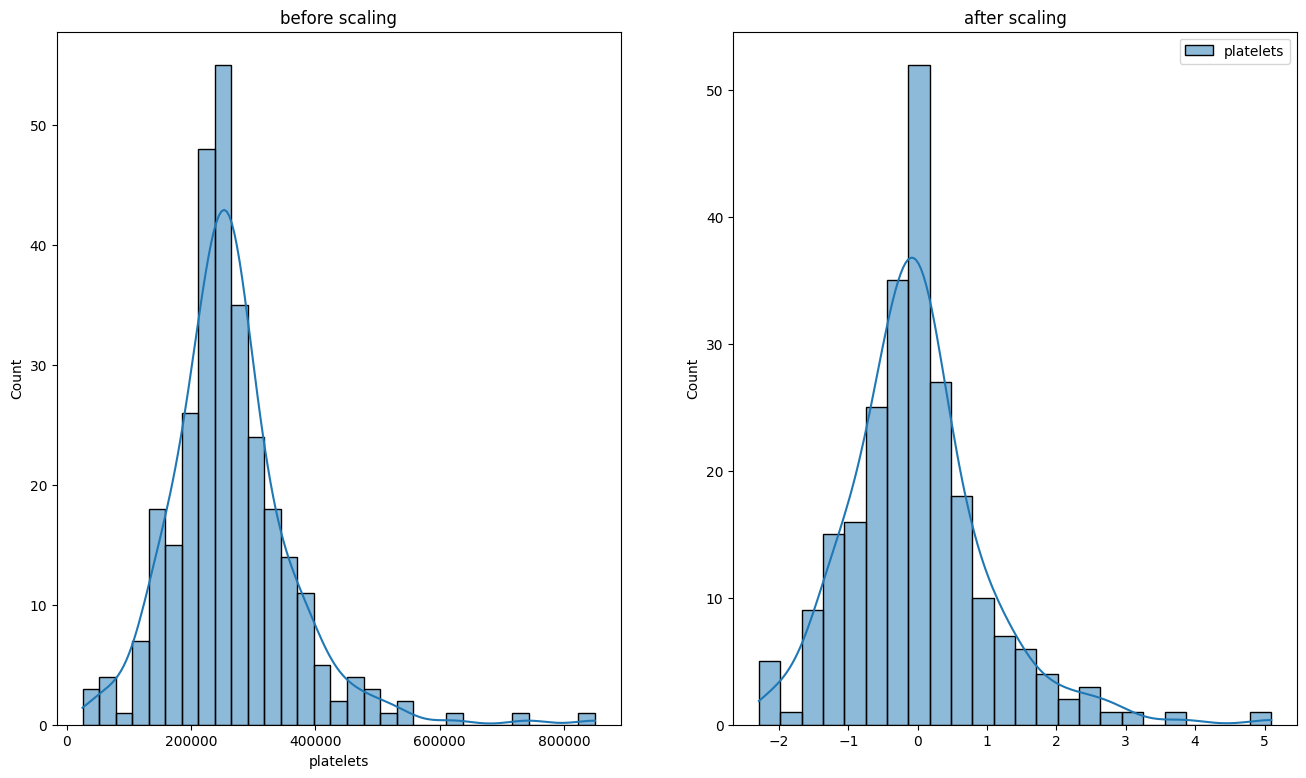

In [25]:

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("before scaling")
sns.histplot(df["platelets"],kde=True)
plt.subplot(122)
plt.title("after scaling")
sns.histplot(st_tr["platelets"],kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `

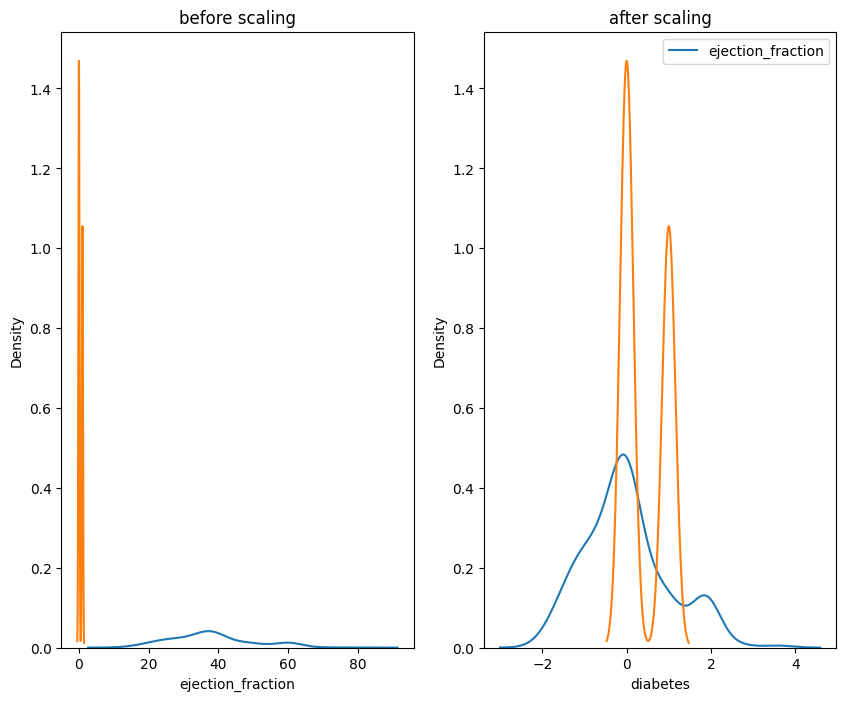

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8))

ax1.set_title("before scaling")
sns.kdeplot(df['ejection_fraction'],ax=ax1)
sns.kdeplot(df['diabetes'],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(st_tr['ejection_fraction'],ax=ax2)
sns.kdeplot(df['diabetes'],ax=ax2)
plt.show()